<a href="https://colab.research.google.com/github/DevashishPrasad/CascadeTabNet/blob/master/Demo/Cascade_TabNet_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="imgs/CVPR Teaser.gif" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [1]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 24kB/s 
     |████████████████████████████████| 4.0MB 53.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0+cu100 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
     |████████████████████████████████| 296kB 26.6MB/s 
     |████████████████████████████████| 194kB 40.6MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 17606, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 17606 (delta 24), reused 42 (delta 7), pack-reused 17523
Receiving objects: 100% (17606/17606), 21.24 MiB | 34.25 MiB/s, done.
Res

Streaming output truncated to the last 5000 lines.
                 from /usr/local/lib/python3.7/dist-packages/torch/include/torch/extension.h:4,
                 from mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:1:
/usr/local/lib/python3.7/dist-packages/torch/include/c10/util/Exception.h:355:40: warning: ‘void c10::detail::deprecated_AT_CHECK()’ is deprecated [-Wdeprecated-declarations]
     ::c10::detail::deprecated_AT_CHECK();                 \
                                        ^
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:22:3: note: in expansion of macro ‘AT_CHECK’
   AT_CHECK(x.is_contiguous(), #x, " must be contiguous ")
   ^~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:25:3: note: in expansion of macro ‘CHECK_CONTIGUOUS’
   CHECK_CONTIGUOUS(x)
   ^~~~~~~~~~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:34:3: note: in expansion of macro ‘CHECK_INPUT’
   CHECK_INPUT(col);
   ^
In file included from /usr/local/lib/python3.7/dist-packages/torch/i

     |████████████████████████████████| 2.1MB 27.1MB/s 
ERROR: bokeh 2.3.2 has requirement pillow>=7.1.0, but you'll have pillow 6.2.1 which is incompatible.
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2


In [20]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2021-05-16 07:16:26--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.202.43.88, 52.202.162.45, 3.230.235.205, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.202.43.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  61.0MB/s    in 0.2s    

2021-05-16 07:16:26 (61.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [26]:
get_ipython().system_raw('./ngrok http 8501 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c 'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://87d0e3a79e05.ngrok.io


In [19]:
#!streamlit run /content/drive/MyDrive/NSD/nsdhack/app.py 
!curl -s http://localhost:4040/api/tunnels | python3 -c \ 
'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Argument expected for the -c option
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

In [1]:
get_ipython().system_raw('./ngrok http 8501 &')


In [2]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://f6631bcffd5a.ngrok.io


In [ ]:
!streamlit run ./app.py 


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.227.176:8501

Dumping file to cache vypiska_7.png...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
2
366
671
885
1411
1689
2062
6
139
256
334
523
792
Dumping file to cache vypiska_5.jpeg...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
4
Дата он-ции

## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [1]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 670, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 670 (delta 3), reused 2 (delta 0), pack-reused 656
Receiving objects: 100% (670/670), 16.56 MiB | 37.27 MiB/s, done.
Resolving deltas: 100% (320/320), done.


## 3. Download the Pretrained Model



In [2]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:05, 117MB/s]


In [3]:
!pip install mmcv==0.4.3

     |████████████████████████████████| 61kB 8.9MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp37-cp37m-linux_x86_64.whl size=171186 sha256=c32243092fb4224c8916da5473a0b8050a4a5c367445dde9137e85d3a61d60b2
  Stored in directory: /root/.cache/pip/wheels/1e/c3/ee/7eddece4815cfe949be3d489912d22465e244260b587bb05e1
Successfully built mmcv
  Found existing installation: mmcv 1.3.4
    Uninstalling mmcv-1.3.4:
      Successfully uninstalled mmcv-1.3.4


In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=dcbd4fbfb15531b154ad33926f6ef8ccda09a4293e0a995cf9ae2ef6f43cc690
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [4]:
!pip install pdf2image
!apt-get install poppler-utils

!pip install pytesseract
!pip install tesseract
!pip install tesseract-ocr
!sudo apt-get install tesseract-ocr-rus
!sudo apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (348 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
  Created wheel for pytesseract: filename=pyte

In [9]:
!pip install streamlit

     |████████████████████████████████| 8.2MB 26.8MB/s 
     |████████████████████████████████| 4.2MB 48.9MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 92kB 12.7MB/s 
     |████████████████████████████████| 112kB 59.5MB/s 
     |████████████████████████████████| 174kB 56.3MB/s 
     |████████████████████████████████| 122kB 56.6MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=e14999029199a85205c5c3edce23dfe3f56242c4fa6b79ffa68aba59aa4ab635
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installa

## 4. Run the Predictions

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


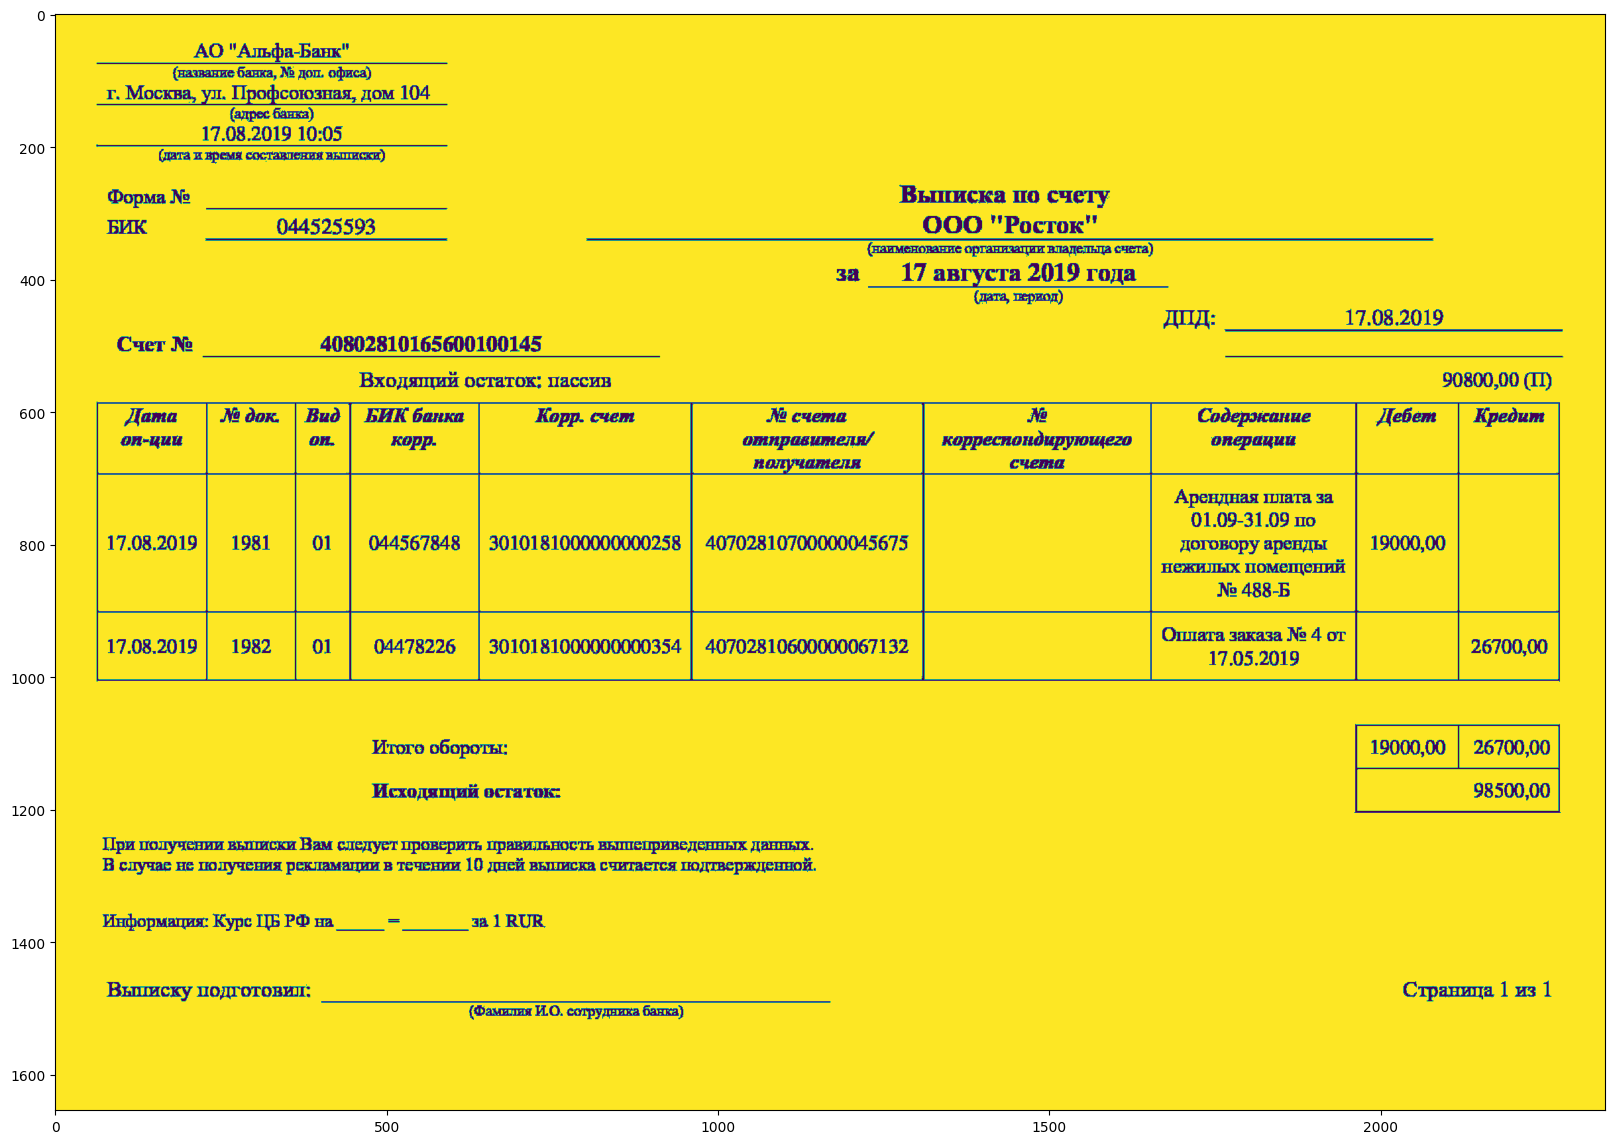

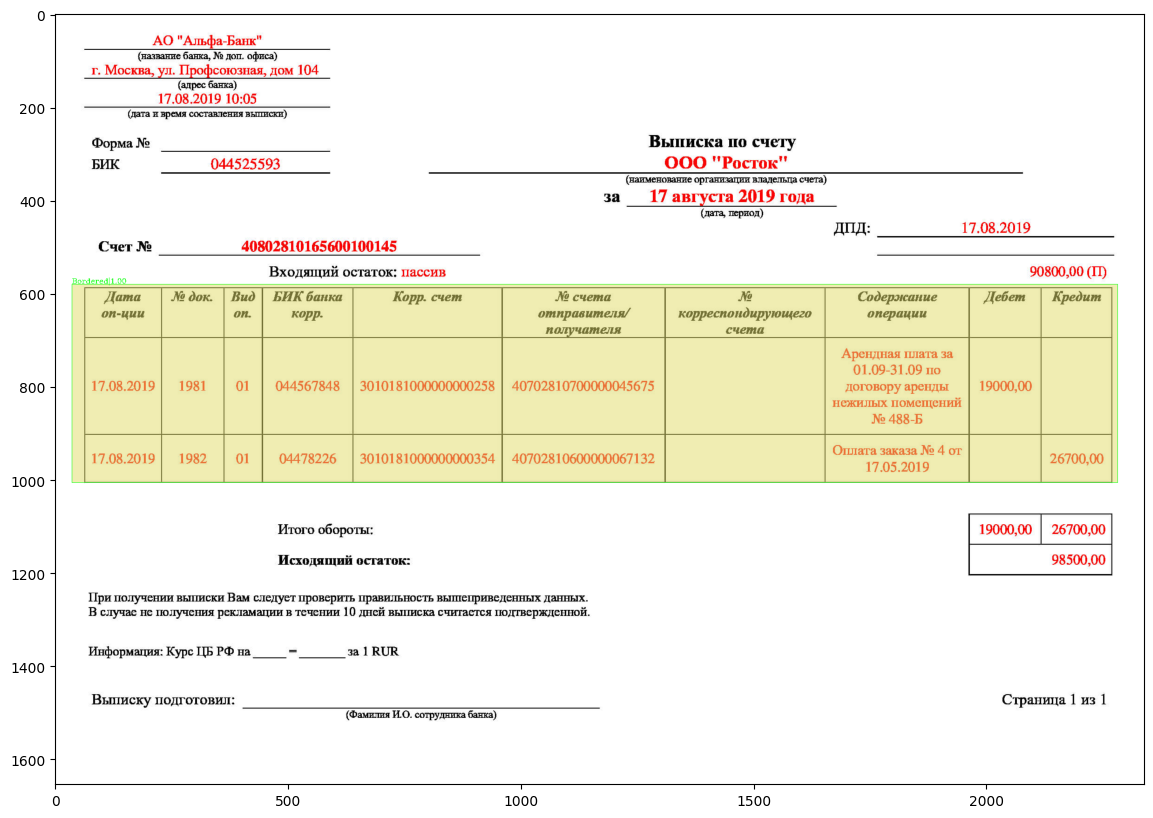

In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
path_ = "vypiska_5.jpeg"#"/content/CascadeTabNet/Demo/demo.png"
image = cv2.imread(path_)
div = 3000//image.shape[0]
image=cv2.resize(image,dsize=(image.shape[1]*div, image.shape[0]*div), interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray, 210, 255,cv2.THRESH_BINARY)[1]
#kernel = np.ones((3,3),np.uint8)
#gray = cv2.dilate(gray, kernel, iterations=3)
plt.figure(figsize=(20, 30))
plt.imshow(gray)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
#cv2.imwrite('img.png', image)
# Run Inference
result = inference_detector(model, gray)

# Visualization results
show_result_pyplot(image, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

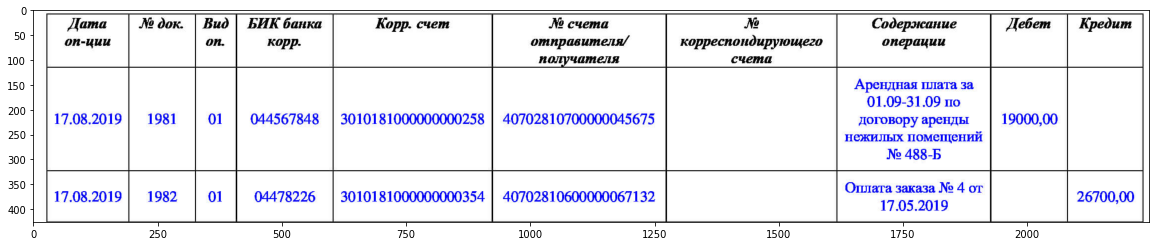

In [2]:
result = result[0]
full_border = len(result[0]) != 0
result = [x for x in result if len(x) !=0]
result = sorted(result, key=len)
res = [int(x) for x in result[0][0]]
table = image[res[1]:res[3],res[0]:res[2]]
cells = [[int(cell[0] - res[0]), int(cell[1] - res[1]),
          int(cell[2] - res[0]), int(cell[3] - res[1])] for cell in result[-1]]
cells = [cell for cell in cells if cell[0] >= 0 and cell[1] >=0]
plt.figure(figsize=(20, 30))
plt.imshow(table)

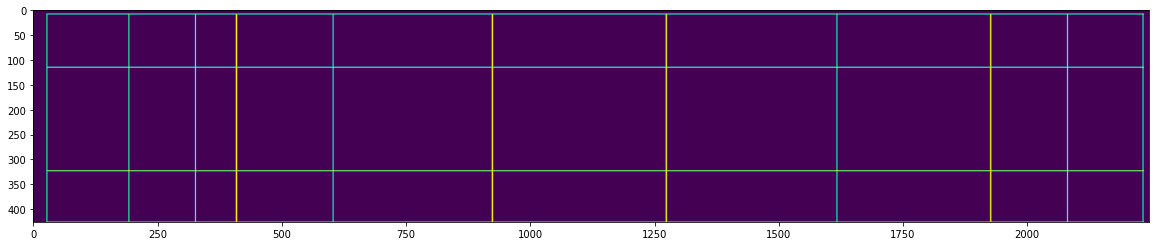

In [3]:
if full_border:
  img = table

  im = cv2.imread(path_)[res[1]//div:res[3]//div,res[0]//div:res[2]//div]
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  dst = cv2.adaptiveThreshold(~im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -2)

  horizontal = dst.copy()
  vertical = dst.copy()
  scale = 13 # play with this variable in order to increase/decrease the amount of lines to be detected

  # Specify size on horizontal axis
  #print(horizontal.shape)
  horizontalsize = horizontal.shape[1] // scale
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize, 1))
  horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
  horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
  #plt.figure(figsize=(20, 30))
  #plt.imshow( horizontal)

  # vertical
  verticalsize = vertical.shape[0] // scale
  verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
  vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
  vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))
  #plt.figure(figsize=(20, 30))
  #plt.imshow( vertical)

  # table line
  grid = horizontal + vertical

  plt.figure(figsize=(20, 30))
  plt.imshow(grid)

In [4]:
if not full_border:
  im = table.copy()
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im = cv2.threshold(im, 170, 255,cv2.THRESH_BINARY)[1]

  grid = np.zeros(im.shape, np.uint8)
  arr = np.zeros(im.shape[1])
  for cell in cells:
    #print(cell)
    arr[cell[0]:cell[2]] += 1

  start = 0
  end = 0
  intervals = []
  for i in range(len(arr)-1):
    if start is not None and (arr[i] == arr[i-1]) and arr[i+1] > arr[i]:
      end = i
      interval = int((end + start)/2)
      print(interval)
      cv2.line(grid, (interval, 0),
                    (interval, im.shape[0]), (255,255,255),3)
      start = None
    if arr[i-1] > arr[i] and arr[i+1] == arr[i]:
      start = i

  end = len(arr) - 1

  arr = np.zeros(im.shape[0])
  for cell in cells:
    #print(cell)
    arr[cell[1]:cell[3]] += 1

  start = 0
  end = 0
  intervals = []
  prev_start = arr[0]
  for i in range(1, len(arr)-1):
    if start is not None and (arr[i] == arr[i-1]) and arr[i+1] > arr[i]:
      end = i
      interval = int((end + start)/2)
      print(interval)
      cv2.line(grid, ( 0, interval),
                    (im.shape[1], interval), (0,255,0),3)
      start = None
    if arr[i-1] > arr[i] and arr[i+1] == arr[i]:
      start = i

  end = len(arr) - 1
  #interval = int((end + start)/2)
  cv2.line(grid, ( 0, im.shape[0]),
                    (im.shape[1], im.shape[0]), (0,255,0),3)

  plt.figure(figsize=(20, 30))
  plt.imshow(grid)

In [5]:
grid.shape, table.shape, img.shape

((101, 717), (710, 5015, 3), (710, 5015, 3))

4
Результат:
Дата он-ции ||Вид |БИК банка корр. ||№ счета отправителя/ получателя |№  корреспондирующего счета   |Содержание операции ||
17.08.2019   |1981 ||044567848 |3010181000000000258   |40702810700000045675   ||Арендная плата за 01.09-31.09 по  договору аренды нежилых помещений № 488-Б   |19000,00 |
17.08.2019 |1982 ||04478226 |3010181000000000354 |40702810600000067132 || ||26700,00 


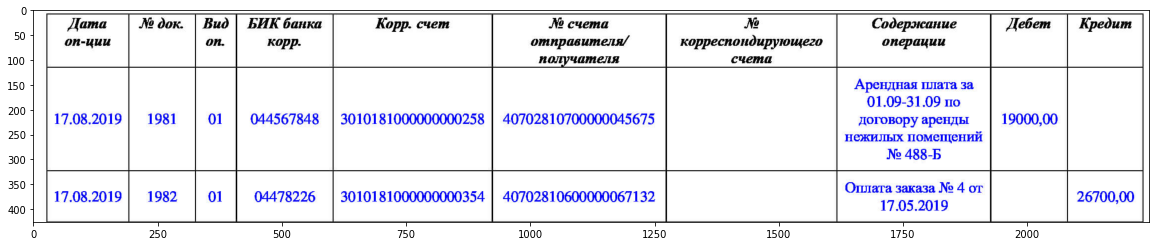

In [5]:

contours,hierarchy = cv2.findContours(grid,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it
cells = []
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)

  if w < 0.9*img.shape[1] and h < 0.95*img.shape[0]:
    cells.append((x, y, w, h))
    #print(x, y, w, h)
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)

#print(sorted(lines, key=lambda x: x[0]))
img = table.copy()#cv2.imread(path_)
div1 = 12000//3000
div *= div1
print(div)
image=cv2.resize(img,dsize=(img.shape[1]*div1, img.shape[0]*div1), interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.threshold(gray, 170, 255,
cv2.THRESH_BINARY)[1]

i=0

clusters = []
for cl in sorted(cells, key=lambda x: (x[1])):
  if cl[2] < 5 or cl[3] < 5:
    continue
  if len(clusters) == 0:
    clusters.append([cl])
  elif abs(cl[1] - clusters[-1][0][1]) < 3 :
    clusters[-1].append(cl) 
  else:
    clusters.append([cl])

res_text = []
for cluster in clusters:
  cluster = sorted(cluster, key=lambda x: (x[0]))
  cur_text = []
  for (x, y, w, h) in cluster:
    cell_ = image[y*div:y*div+h*div, x*div:x*div+w*div]
    text = ' '.join([phrase.strip() for phrase in pytesseract.image_to_string(cell_, lang='rus').split('\n')])
    #print(text)
    cur_text.append(text)
  res_text.append('|'.join(cur_text))

print('Результат:')
for s in res_text:
  print(s)
plt.figure(figsize=(20, 30))
(x, y, w, h) = (161, 152, 114, 19)
plt.imshow(img)#[y*div:y*div+h*div, x*div:x*div+w*div])

# Cite as
If you find this work useful for your research, please cite our paper:

```
@misc{ cascadetabnet2020,
    title={CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents},
    author={Devashish Prasad and Ayan Gadpal and Kshitij Kapadni and Manish Visave and Kavita Sultanpure},
    year={2020},
    eprint={2004.12629},
    archivePrefix={arXiv},
    primaryClass={cs.CV}
}
```
